## Libraries

In [1]:
import pandas as pd

## Data Prep

In [33]:
aq_data = pd.read_csv('AURN_2015_2023_daily.csv',index_col=0)
output_data = pd.read_csv('output_data.csv')

In [34]:
output_data.head()


,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,...,latitude,longitude,elevation,u,v,canyon_factor,windward_height_avg,leeward_height_avg,road_distance,indicatedspeed_kph
0,2018-01-01,2.0,1.5,3.7,0.0,NaN,302.0,10.6,NaN,988.1,...,57.144555,-2.106472,25.66,9.733671,4.197100,10.6,8.962069,7.796154,15.215526,32
1,2018-01-02,2.3,0.3,4.7,1.4,NaN,214.0,13.3,NaN,993.3,...,57.144555,-2.106472,25.66,12.391762,4.830553,26.6,7.796154,8.962069,15.215526,32
2,2018-01-03,1.7,0.4,5.0,0.4,NaN,327.0,8.7,NaN,982.2,...,57.144555,-2.106472,25.66,8.374600,2.357133,8.7,8.962069,7.796154,15.215526,32
3,2018-01-04,1.9,-0.2,3.3,1.2,NaN,17.0,5.4,NaN,988.8,...,57.144555,-2.106472,25.66,-1.485882,-5.191546,5.4,8.962069,7.796154,15.215526,32
4,2018-01-05,1.9,0.6,2.6,7.6,NaN,4.0,8.5,NaN,994.3,...,57.144555,-2.106472,25.66,-5.555971,-6.432821,8.5,8.962069,7.796154,15.215526,32


##### Subset Columns interested in

In [63]:
## select columns
aq_no2 = aq_data[['site','code','date','no2']].copy()
## merge with output_data at code and date. 
aq_no2.rename(columns={"code": "site_id", "date": "time"},inplace=True)


data = aq_no2.merge(output_data, on=['time', 'site_id'])

data.head()

,site,site_id,time,no2,tavg,tmin,tmax,prcp,snow,wdir,...,latitude,longitude,elevation,u,v,canyon_factor,windward_height_avg,leeward_height_avg,road_distance,indicatedspeed_kph
0,Aberdeen Union Street Roadside,ABD7,2018-01-01,50.275570,2.0,1.5,3.7,0.0,NaN,302.0,...,57.144555,-2.106472,25.66,9.733671,4.197100,10.6,8.962069,7.796154,15.215526,32
1,Aberdeen Union Street Roadside,ABD7,2018-01-02,42.579688,2.3,0.3,4.7,1.4,NaN,214.0,...,57.144555,-2.106472,25.66,12.391762,4.830553,26.6,7.796154,8.962069,15.215526,32
2,Aberdeen Union Street Roadside,ABD7,2018-01-03,74.239862,1.7,0.4,5.0,0.4,NaN,327.0,...,57.144555,-2.106472,25.66,8.374600,2.357133,8.7,8.962069,7.796154,15.215526,32
3,Aberdeen Union Street Roadside,ABD7,2018-01-04,56.537070,1.9,-0.2,3.3,1.2,NaN,17.0,...,57.144555,-2.106472,25.66,-1.485882,-5.191546,5.4,8.962069,7.796154,15.215526,32
4,Aberdeen Union Street Roadside,ABD7,2018-01-05,57.666231,1.9,0.6,2.6,7.6,NaN,4.0,...,57.144555,-2.106472,25.66,-5.555971,-6.432821,8.5,8.962069,7.796154,15.215526,32


In [72]:
data['date']  = pd.to_datetime(data['time'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day'] = data['date'].dt.day
data['jdate'] = pd.DatetimeIndex(data['date']).to_julian_date()
data.head()

,site,site_id,time,no2,tavg,tmin,tmax,prcp,snow,wdir,...,canyon_factor,windward_height_avg,leeward_height_avg,road_distance,indicatedspeed_kph,date,month,year,day,jdate
0,Aberdeen Union Street Roadside,ABD7,2018-01-01,50.275570,2.0,1.5,3.7,0.0,NaN,302.0,...,10.6,8.962069,7.796154,15.215526,32,2018-01-01,1,2018,1,2458119.5
1,Aberdeen Union Street Roadside,ABD7,2018-01-02,42.579688,2.3,0.3,4.7,1.4,NaN,214.0,...,26.6,7.796154,8.962069,15.215526,32,2018-01-02,1,2018,2,2458120.5
2,Aberdeen Union Street Roadside,ABD7,2018-01-03,74.239862,1.7,0.4,5.0,0.4,NaN,327.0,...,8.7,8.962069,7.796154,15.215526,32,2018-01-03,1,2018,3,2458121.5
3,Aberdeen Union Street Roadside,ABD7,2018-01-04,56.537070,1.9,-0.2,3.3,1.2,NaN,17.0,...,5.4,8.962069,7.796154,15.215526,32,2018-01-04,1,2018,4,2458122.5
4,Aberdeen Union Street Roadside,ABD7,2018-01-05,57.666231,1.9,0.6,2.6,7.6,NaN,4.0,...,8.5,8.962069,7.796154,15.215526,32,2018-01-05,1,2018,5,2458123.5


In [50]:

data.head()

,site,site_id,time,no2,tavg,tmin,tmax,prcp,snow,wdir,...,canyon_factor,windward_height_avg,leeward_height_avg,road_distance,indicatedspeed_kph,date,month,year,day,jdate
0,Aberdeen Union Street Roadside,ABD7,2018-01-01,50.275570,2.0,1.5,3.7,0.0,NaN,302.0,...,10.6,8.962069,7.796154,15.215526,32,2018-01-01,1,2018,1,2458119.5
1,Aberdeen Union Street Roadside,ABD7,2018-01-02,42.579688,2.3,0.3,4.7,1.4,NaN,214.0,...,26.6,7.796154,8.962069,15.215526,32,2018-01-02,1,2018,2,2458120.5
2,Aberdeen Union Street Roadside,ABD7,2018-01-03,74.239862,1.7,0.4,5.0,0.4,NaN,327.0,...,8.7,8.962069,7.796154,15.215526,32,2018-01-03,1,2018,3,2458121.5
3,Aberdeen Union Street Roadside,ABD7,2018-01-04,56.537070,1.9,-0.2,3.3,1.2,NaN,17.0,...,5.4,8.962069,7.796154,15.215526,32,2018-01-04,1,2018,4,2458122.5
4,Aberdeen Union Street Roadside,ABD7,2018-01-05,57.666231,1.9,0.6,2.6,7.6,NaN,4.0,...,8.5,8.962069,7.796154,15.215526,32,2018-01-05,1,2018,5,2458123.5


In [51]:
data.dtypes

site                           object
site_id                        object
time                           object
no2                           float64
tavg                          float64
tmin                          float64
tmax                          float64
prcp                          float64
snow                          float64
wdir                          float64
wspd                          float64
wpgt                          float64
pres                          float64
tsun                          float64
latitude                      float64
longitude                     float64
elevation                     float64
u                             float64
v                             float64
canyon_factor                 float64
windward_height_avg           float64
leeward_height_avg            float64
road_distance                 float64
indicatedspeed_kph              int64
date                   datetime64[ns]
month                           int32
year        

In [80]:
selected_columns = data.select_dtypes(include=['float64','int64','int32'])
selected_columns = selected_columns.drop(columns=['snow','tsun'])
selected_columns.head()

,no2,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,latitude,...,v,canyon_factor,windward_height_avg,leeward_height_avg,road_distance,indicatedspeed_kph,month,year,day,jdate
0,50.275570,2.0,1.5,3.7,0.0,302.0,10.6,NaN,988.1,57.144555,...,4.197100,10.6,8.962069,7.796154,15.215526,32,1,2018,1,2458119.5
1,42.579688,2.3,0.3,4.7,1.4,214.0,13.3,NaN,993.3,57.144555,...,4.830553,26.6,7.796154,8.962069,15.215526,32,1,2018,2,2458120.5
2,74.239862,1.7,0.4,5.0,0.4,327.0,8.7,NaN,982.2,57.144555,...,2.357133,8.7,8.962069,7.796154,15.215526,32,1,2018,3,2458121.5
3,56.537070,1.9,-0.2,3.3,1.2,17.0,5.4,NaN,988.8,57.144555,...,-5.191546,5.4,8.962069,7.796154,15.215526,32,1,2018,4,2458122.5
4,57.666231,1.9,0.6,2.6,7.6,4.0,8.5,NaN,994.3,57.144555,...,-6.432821,8.5,8.962069,7.796154,15.215526,32,1,2018,5,2458123.5


In [81]:
## show number of NaN in columns 
selected_columns.isnull().sum()

## fill NaN with mean

selected_columns = selected_columns.fillna(selected_columns.mean())
## show number of NaN in columns 
selected_columns.isnull().sum()

selected_columns.head()



,no2,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,latitude,...,v,canyon_factor,windward_height_avg,leeward_height_avg,road_distance,indicatedspeed_kph,month,year,day,jdate
0,50.275570,2.0,1.5,3.7,0.0,302.0,10.6,34.898746,988.1,57.144555,...,4.197100,10.6,8.962069,7.796154,15.215526,32,1,2018,1,2458119.5
1,42.579688,2.3,0.3,4.7,1.4,214.0,13.3,34.898746,993.3,57.144555,...,4.830553,26.6,7.796154,8.962069,15.215526,32,1,2018,2,2458120.5
2,74.239862,1.7,0.4,5.0,0.4,327.0,8.7,34.898746,982.2,57.144555,...,2.357133,8.7,8.962069,7.796154,15.215526,32,1,2018,3,2458121.5
3,56.537070,1.9,-0.2,3.3,1.2,17.0,5.4,34.898746,988.8,57.144555,...,-5.191546,5.4,8.962069,7.796154,15.215526,32,1,2018,4,2458122.5
4,57.666231,1.9,0.6,2.6,7.6,4.0,8.5,34.898746,994.3,57.144555,...,-6.432821,8.5,8.962069,7.796154,15.215526,32,1,2018,5,2458123.5


In [82]:
X_preprocess = selected_columns[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres','latitude', 'longitude', 'elevation']]
X_postprocess = selected_columns.drop(columns=['no2'])

In [83]:
X_preprocess.head()
X_postprocess.head()

,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,latitude,longitude,...,v,canyon_factor,windward_height_avg,leeward_height_avg,road_distance,indicatedspeed_kph,month,year,day,jdate
0,2.0,1.5,3.7,0.0,302.0,10.6,34.898746,988.1,57.144555,-2.106472,...,4.197100,10.6,8.962069,7.796154,15.215526,32,1,2018,1,2458119.5
1,2.3,0.3,4.7,1.4,214.0,13.3,34.898746,993.3,57.144555,-2.106472,...,4.830553,26.6,7.796154,8.962069,15.215526,32,1,2018,2,2458120.5
2,1.7,0.4,5.0,0.4,327.0,8.7,34.898746,982.2,57.144555,-2.106472,...,2.357133,8.7,8.962069,7.796154,15.215526,32,1,2018,3,2458121.5
3,1.9,-0.2,3.3,1.2,17.0,5.4,34.898746,988.8,57.144555,-2.106472,...,-5.191546,5.4,8.962069,7.796154,15.215526,32,1,2018,4,2458122.5
4,1.9,0.6,2.6,7.6,4.0,8.5,34.898746,994.3,57.144555,-2.106472,...,-6.432821,8.5,8.962069,7.796154,15.215526,32,1,2018,5,2458123.5


## Modelling

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

## split data
y = selected_columns['no2']
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X_preprocess, y, test_size=0.2)
X_train_post, X_test_post,y_train_post, y_test_post = train_test_split(X_postprocess,y,test_size=0.2)

## train model
## xgboost 
from xgboost import XGBRegressor
preprocess_model = XGBRegressor()
preprocess_model.fit(X_train_pre, y_train)

postprocess_model = XGBRegressor()
postprocess_model.fit(X_train_post, y_train_post)

## predict
y_pred_pre = preprocess_model.predict(X_test_pre)
y_pred_post = postprocess_model.predict(X_test_post)

## evaluate
rmse_pre = np.sqrt(mean_squared_error(y_test, y_pred_pre))
r2_pre = r2_score(y_test, y_pred_pre)

rmse_post = np.sqrt(mean_squared_error(y_test_post, y_pred_post))
r2_post = r2_score(y_test_post, y_pred_post)

print(f'Preprocess model RMSE: {rmse_pre}, R2: {r2_pre}')
print(f'Postprocess model RMSE: {rmse_post}, R2: {r2_post}')


Preprocess model RMSE: 7.853004409005766, R2: 0.7102936231047382
Postprocess model RMSE: 6.579264398872551, R2: 0.7948632275091202


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

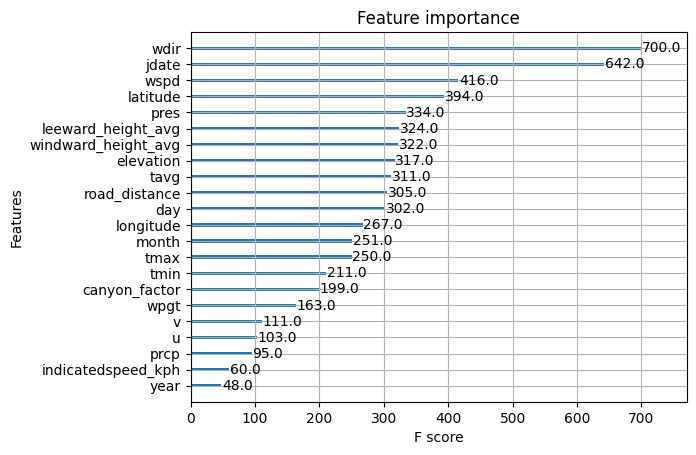

In [85]:
## plot feature importance 
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(postprocess_model)
